In [90]:
import os
from collections import Counter

import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

f_read = os.path.join("../parsed_data/sentence_parse/",
                          'complete_gendered_sentences.csv')
df = pd.read_csv(f_read)

print(df.shape)

#filter out rows we don't want
#no NaNs - at least one good name
df = df[np.invert( np.isnan(df['Is Female (Weighted)']))]
#no empty lines (should have been filtered out by the above, these must be 'extra' rows caused by newlines in text string, I didn't know pandas would do that)
df = df[[isinstance(n,str) for n in df['Names']]] 
# Only rows with one name
sg_df = df[[';' not in n for n in df['Names']]] 

#print(sg_df.shape)
#print (sg_df[2:3])

#output file
#f_save = os.path.join("../parsed_data/sentence_parse/",
#                          'sample_single_gendered_sentences.csv')
#sg_df.to_csv(f_save)

(1035957, 7)


like 46628 0.5185535038995539 1730.2255596567989
thank 166941 0.5138979918572797 4640.289317292258
support 2216 0.47318261514455195 118.85464967934574
wish 10664 0.5250431223066022 534.1197125552121
acknowledge 28479 0.5219820037041755 1252.0509669824262
provide 40262 0.41000280329358035 7246.934267587736
help 6882 0.5115440233085095 158.89193681832413
take 1259 0.5384827397354558 96.8995386538777
edit 5893 0.6295316215290341 1526.6596913411956
proofread 1771 0.5905501455342008 320.72861548213933
carry 1407 0.4837114900183578 45.8358670883412
give 2143 0.433099644900663 286.7349219557584
dedicate 3063 0.3054093827584069 1192.0621212219994
analyze 939 0.45745286627450404 79.90351713648141
interpret 311 0.42753229567264056 45.07491209161757
prepare 3396 0.6080897692594897 734.1457128104537
extend 1336 0.49482995967639415 13.814347744674834
hold 1011 0.4709050188171333 58.83005195175644
perform 5084 0.5178769751021068 181.77308283822236
test 352 0.536745309199177 25.868697676220577
record

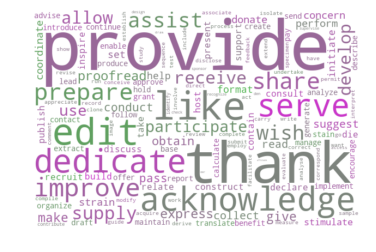

In [91]:
def word_gender(word): 
    uses = sg_df['Is Female (Weighted)'][ [isinstance(n,str) and word in n for n in sg_df['Verbs'] ] ]
    #print (word, uses)
    avgen = sg_df['Is Female (Weighted)'].mean()
    if not len(uses): 
        val= avgen
    else: 
        val = np.array(uses).mean()
    valdiff = val-avgen
    if valdiff >= 0:
        #print(val,avgen,0.5*(1 + valdiff/avgen))
        outval = 0.5 + valdiff*avgen/0.5
    else:
        outval = 0.5 + valdiff*0.5/avgen
    #print(word,val,outval)
    return outval
        
    #normalize to countract average gender disparity



allwords = []
for n in sg_df['Verbs']:
    if isinstance(n,str):
        allwords.extend(n.split(';'))
    
worddict = Counter(allwords)    
#print (Counter(allwords).keys())
#print (Counter(allwords).values())
for k in worddict:
    if worddict[k] < 200: 
        worddict[k] = 0
        continue
    val = word_gender(k)
    gen_val = 2*np.abs(val-0.5)
    print(k,worddict[k],val,worddict[k]*gen_val)
    worddict[k] = worddict[k]*gen_val
    

print(sg_df['Is Female (Weighted)'].mean())



print(word_gender('assistance'))

def gender_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    gender = word_gender(word)
    gender = int(255*gender)
    #print (word,gender)
    return (256-gender,gender,256-gender)#"hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wordcloud = WordCloud(background_color='white',width=600,height=400).generate_from_frequencies(worddict)
wordcloud.recolor(color_func=gender_color_func)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file('../figures/cloud_gendered_verbs.png')